## ADSP 31017 Final Project Medicare Fraud Detection

In [142]:
# Load libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# File name
directory = '/Users/peytonnash/Documents/university_of_chicago/02_wint_25/adsp_31017/project/archive/'
path_label = f'{directory}Train_Beneficiarydata-1542865627584.csv'
path_unlabel  = f'{directory}Test_Beneficiarydata-1542969243754.csv'

# Read in the shape file
df_label = pd.read_csv(path_label)
df_unlabel = pd.read_csv(path_unlabel)

In [144]:
# Check shared columns
print(f'{len(df_label.columns[df_label.columns.isin(df_unlabel.columns)])} of the {len(df_label.columns)} columns in the labelled data are also in unlabelled data')
print(f'{len(df_unlabel.columns[df_unlabel.columns.isin(df_label.columns)])} of the {len(df_unlabel.columns)} columns in the unlabelled data are also in unlabelled data')

25 of the 25 columns in the labelled data are also in unlabelled data
25 of the 25 columns in the unlabelled data are also in unlabelled data


All of the columns are in both the labelled and unlabelled data.

In [145]:
# Create a column to identify whether the data comes from the labelled or unlabelled data
df_label['labelled'] = 1
df_unlabel['labelled'] = 0

In [146]:
# Append the unlabelled data to the labelled data
df = pd.concat([df_label, df_unlabel], axis = 0)

In [147]:
# Check the dimensions of the data
print(f'Unlabelled DataFrame dimensions: {df_unlabel.shape}')
print(f'Labelled DataFrame dimensions: {df_label.shape}')
print(f'Total number of rows: {df_label.shape[0] + df_unlabel.shape[0]}')
print(f'Appended DataFrame dimensions: {df.shape}')

Unlabelled DataFrame dimensions: (63968, 26)
Labelled DataFrame dimensions: (138556, 26)
Total number of rows: 202524
Appended DataFrame dimensions: (202524, 26)


The dimensions of the appended DataFrame aligns with the number of rows and columns in the raw DataFrames.

In [148]:
# Check missingness of the data
print('Number of missing values:')
print(df.isna().sum())

Number of missing values:
BeneID                                  0
DOB                                     0
DOD                                200529
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnual

The data of death column is the only column with missing data. This is likely because these beneficiaries are still alive, but there is no data dictionary to confirm this.

In [149]:
print(f'Number of observations in the labelled data: {len(df[df['labelled'] == 1]['BeneID'])}')
print(f'Number of unique IDs in the labelled data: {len(df[df['labelled'] == 1]['BeneID'].unique())}')

Number of observations in the labelled data: 138556
Number of unique IDs in the labelled data: 138556


In [150]:
print(f'Number of observations in the unlabelled data: {len(df[df['labelled'] == 0]['BeneID'])}')
print(f'Number of unique IDs in the unlabelled data: {len(df[df['labelled'] == 0]['BeneID'].unique())}')

Number of observations in the unlabelled data: 63968
Number of unique IDs in the unlabelled data: 63968


In [151]:
# Check for uniqueness of the ID column
print(f'Number of observations: {len(df['BeneID'])}')
print(f'Number of unique IDs: {len(df['BeneID'].unique())}')

Number of observations: 202524
Number of unique IDs: 148072


In [152]:
# Check for duplicated rows
print(f'Total number of rows: {len(df)}')
print(f'Number of non-duplicated rows: {np.invert(df.drop(['labelled'], axis = 1).duplicated()).sum()}')

Total number of rows: 202524
Number of non-duplicated rows: 148072


The beneficiary ID column is not a unique identifier. Of the beneficiaries in the unlabelled data, there are fewer than 10,000 who are not already in the labelled data.

In [153]:
# Remove duplicated observations
df_unique = df.drop(['labelled'], axis = 1).drop_duplicates(keep='first')

In [154]:
# Check distributions and descriptive statistics
df_unique.drop(['BeneID'], axis = 1).describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,...,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000,148072.000000
mean,1.570074,1.254120,25.777737,374.726471,11.904526,11.905647,1.673821,1.514479,1.695959,1.882604,...,1.651548,1.407970,1.332683,1.729523,1.748676,1.923037,3516.048341,383.743179,1248.929777,363.234082
std,0.495067,0.716266,15.188051,267.122739,1.049328,0.958995,0.468815,0.499792,0.460002,0.321892,...,0.476482,0.491459,0.471176,0.444208,0.433776,0.266533,9382.376384,935.582471,2455.083624,631.327349
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,150.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,530.000000,150.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,140.000000,1068.000000,1440.000000,440.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [155]:
# Check the state/county columns
df_unique.groupby('County')['State'].unique()

County
0      [32, 7, 33, 10, 49, 31, 5, 22, 34, 9, 25, 39, ...
1                                                   [54]
10     [7, 38, 29, 3, 36, 24, 1, 39, 51, 22, 15, 42, ...
11                                              [49, 11]
14                                                  [30]
                             ...                        
992                                         [18, 14, 26]
993                                                 [26]
994                                                 [26]
996                                                 [26]
999                                                 [54]
Name: State, Length: 314, dtype: object

Data preparation is needed:
- Gender
- Race is categorical
- State is categorical
- County ranges from 0 to 999
- Chronic condition columns are categorical
- Reimbursement amounts take negative values.
- Potential outliers in the reimbursement and deductible columns

In [156]:
df_unique.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [157]:
# Identify categorical and continuous columns
cols_cat = df_unique.drop(['BeneID', 'County', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'DOB', 'DOD'], axis = 1).columns
cols_cont = df_unique[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].columns

In [158]:
cols_cont.shape

(4,)

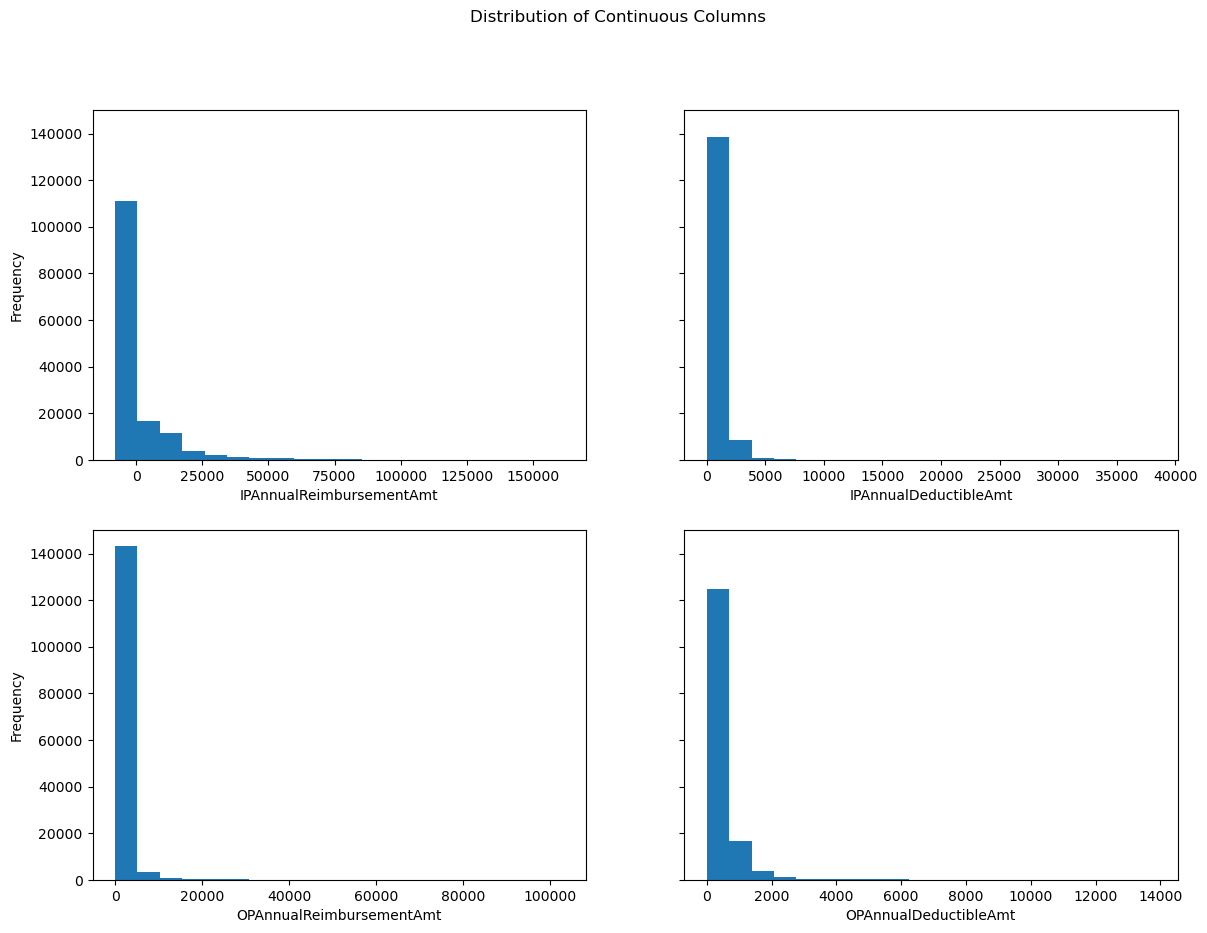

In [159]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10), sharey=True, )
fig.suptitle('Distribution of Continuous Columns')
for col_i, col in enumerate(cols_cont):
    x = col_i % 2
    y = math.floor(col_i/2)
    axs[y, x].hist(df_unique[col], bins = 20)
    axs[y, x].set_xlabel(col)
    if y == 0:
        axs[x, y].set_ylabel('Frequency')

Most beneficiaries receive less than $\$2,000$ in in-patient and out-patient reimbursements and have in-patient deductibles less than $\$5,000$ and out-patient deductibles less than $\$2,000$.

In [160]:
# Check the distribution of discrete columns
for col_i, col in enumerate(cols_cat):
    print(df_unique[col].value_counts())

Gender
2    84412
1    63660
Name: count, dtype: int64
Race
1    125103
2     14504
3      5368
5      3097
Name: count, dtype: int64
RenalDiseaseIndicator
0    127682
Y     20390
Name: count, dtype: int64
State
5     12351
10    10358
45     9633
33     8922
39     6497
14     6294
36     5880
23     5527
34     4971
31     4580
11     4175
49     3889
44     3541
22     3440
15     3436
26     3318
50     2896
52     2888
1      2830
18     2719
42     2653
21     2625
3      2506
24     2396
19     2221
37     2099
6      1872
4      1863
7      1863
16     1836
25     1760
38     1597
17     1553
54     1324
51     1286
20      970
29      954
32      938
28      919
46      861
30      788
13      703
27      599
8       571
41      557
12      513
43      474
35      430
47      411
53      317
9       253
2       215
Name: count, dtype: int64
NoOfMonths_PartACov
12    146776
0       1104
6         43
11        33
8         29
10        19
7         17
4         15
9         13
5

The value counts seem reasonable, but are difficult to fully evaluate without a data dictionary to map values to. There is some data processing that needs to be done before modeling.

In [ ]:
# Convert RenalDiseaseIndicator to numeric
df_unique['RenalDiseaseIndicator'] = np.where(df_unique.RenalDiseaseIndicator == 'Y', 1, 0)

# Check creation of the column
df_unique['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    127682
1     20390
Name: count, dtype: int64

In [172]:
df_unique = pd.get_dummies(df_unique, columns = ['Race'])

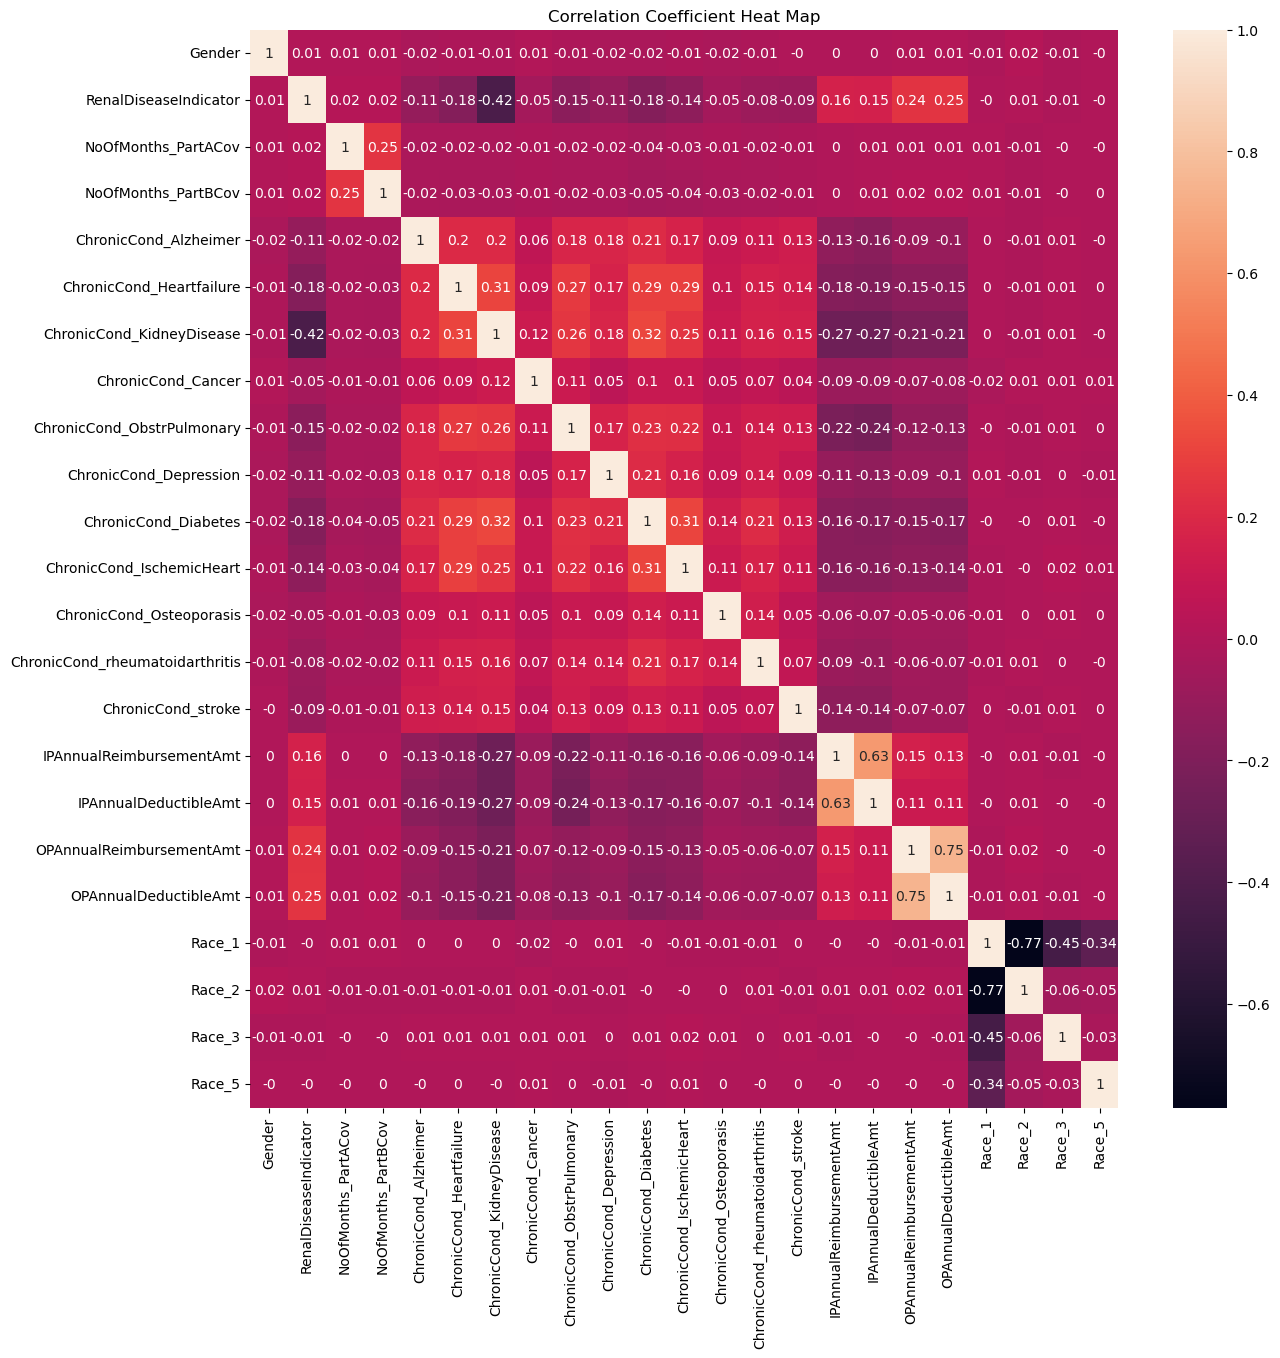

In [173]:
# Check correlation
corr = df_unique.drop(['BeneID', 'DOB', 'DOD', 'State', 'County'], axis = 1).corr().round(2)

# Plot correlation on a heatmap
plt.figure(figsize=(14, 14))
plt.title('Correlation Coefficient Heat Map')
sns.heatmap(corr, annot = True)
plt.show()

In-patient and out-patient reimbursement and deductibles have a strong, positive correlation. As expected, there is a strong relationship between the renal disease indicator and chronic kidney disease, but it is negative, suggesting that, for the other indicator variables, $2$ indicates that they do not have a chronic condition and $1$ indicates that they do.